# BANA-273 Term Project
### Group 22: William Leonard, Susan Mikhail, Matthias Ronnau, Lokesh Nandni Sood, Parsa Tahmasebi

## Import Packages and Read in the Data

In [1]:
#Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import mutual_info_classif

In [2]:
#Read the data in and take a look at it
data = pd.read_csv("OnlineNewsPopularity.csv")

data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


## Exploratory Data Analysis and Data Cleaning

In [3]:
#Check the number of rows and column of the data
data.shape

(39644, 61)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

There does not appear to be missing values in the dataset, which is great.

In [5]:
data.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [6]:
#The columns appear to have a space at the beginning of the name, let's remove that
data.columns = data.columns.str.replace(" ", "")

In [7]:
#Remove the two descriptive variables which are not used for prediction
data.drop(["url", "timedelta"], axis = 1, inplace = True)

Text(0.5, 1.0, 'Heatmap Showing the Correlation Between Variables')

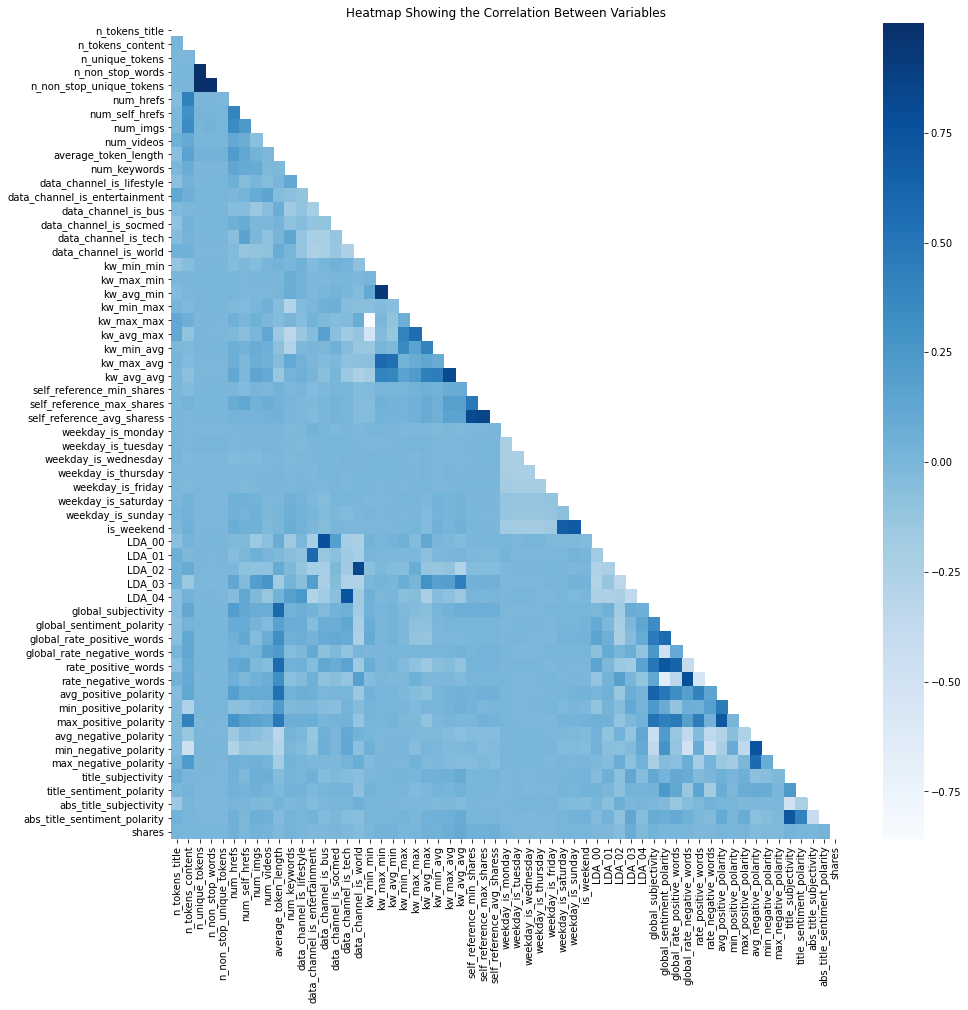

In [8]:
#Heatmap showing the correlation between variables
data_correlation = data.corr()
plt.figure(figsize = (15, 15))
mask = np.triu(np.ones_like(data_correlation, dtype=bool))
sns.heatmap(data_correlation, mask = mask, cmap = "Blues")
plt.title("Heatmap Showing the Correlation Between Variables")

The minimum value for the column "n_tokens_content" is 0. This column represents the number of words in the document. It does not benefit our analysis to include data on articles with no content, so we will remove them.

(array([3.9563e+04, 6.0000e+01, 1.1000e+01, 4.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 3.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([1.000000e+00, 8.433090e+04, 1.686608e+05, 2.529907e+05,
        3.373206e+05, 4.216505e+05, 5.059804e+05, 5.903103e+05,
        6.746402e+05, 7.589701e+05, 8.433000e+05]),
 <BarContainer object of 10 artists>)

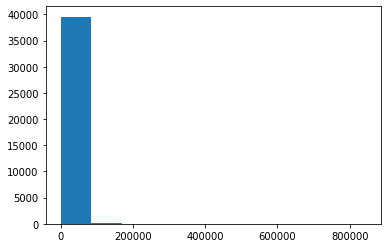

In [9]:
plt.hist(data["shares"])

In [10]:
data[data["n_tokens_content"] > 3000]

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
1138,9.0,3027.0,0.299265,1.0,0.489583,3.0,2.0,25.0,0.0,4.274199,...,0.100000,1.0,-0.245833,-0.9,-0.012500,0.000000,0.000000,0.500000,0.000000,3800
1344,11.0,4125.0,0.276851,1.0,0.447151,8.0,8.0,21.0,0.0,4.332848,...,0.033333,1.0,-0.236260,-0.8,-0.050000,0.666667,0.458333,0.166667,0.458333,3400
1658,7.0,3288.0,0.375468,1.0,0.504087,29.0,24.0,1.0,73.0,4.720803,...,0.033333,1.0,-0.356952,-1.0,-0.071429,0.666667,0.333333,0.166667,0.333333,2300
1721,12.0,3137.0,0.266514,1.0,0.421053,12.0,12.0,21.0,0.0,4.211986,...,0.050000,1.0,-0.204933,-0.6,-0.025000,1.000000,0.333333,0.500000,0.333333,1800
2100,10.0,3050.0,0.399662,1.0,0.514995,8.0,2.0,1.0,73.0,4.939672,...,0.033333,1.0,-0.348389,-1.0,-0.050000,1.000000,0.000000,0.500000,0.000000,1700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36902,9.0,3359.0,0.351473,1.0,0.566188,10.0,10.0,12.0,1.0,4.421256,...,0.100000,1.0,-0.385982,-1.0,-0.025000,0.000000,0.000000,0.500000,0.000000,1000
37112,8.0,3810.0,0.299815,1.0,0.489796,23.0,0.0,2.0,0.0,4.629396,...,0.100000,1.0,-0.385897,-1.0,-0.050000,1.000000,-0.500000,0.500000,0.500000,1300
37116,7.0,3550.0,0.236477,1.0,0.416667,4.0,3.0,10.0,1.0,4.004789,...,0.033333,1.0,-0.319520,-1.0,-0.025000,0.000000,0.000000,0.500000,0.000000,2500
37558,10.0,3662.0,0.187208,1.0,0.344156,13.0,2.0,1.0,0.0,3.798198,...,0.100000,1.0,-0.268374,-0.7,-0.050000,0.000000,0.000000,0.500000,0.000000,1500


In [11]:
min_shares = data["shares"].min() - 1
shares_50 = data["shares"].quantile(.50)
max_shares = data["shares"].max() + 1

popularity = pd.cut(data["shares"], bins = [min_shares, shares_50, max_shares], 
       labels = ["Low", "High"])

data["Popularity"] = popularity

In [12]:
data.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,Popularity
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,Low
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,Low
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,High
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,Low
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,Low


Text(0.5, 1.0, 'Histogram of Number of Shares for Articles With Less than 10,000 Shares')

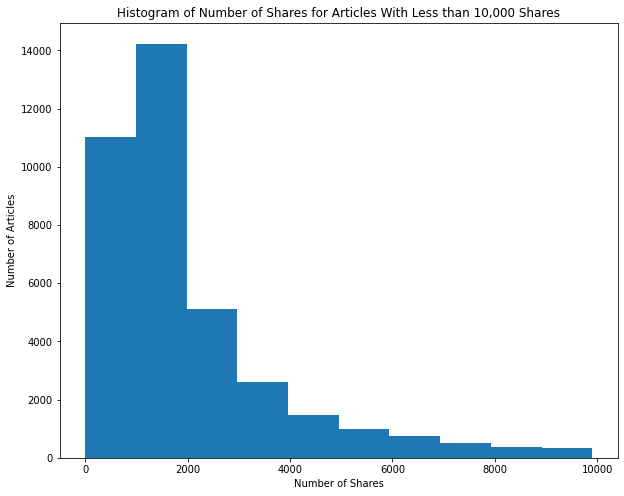

In [13]:
plt.figure(figsize = (10, 8))
plt.hist(data[data["shares"] < 10000]["shares"])
plt.xlabel("Number of Shares")
plt.ylabel("Number of Articles")
plt.title("Histogram of Number of Shares for Articles With Less than 10,000 Shares")

In [14]:
shares_skew = data["shares"].skew()
shares_kurtosis = data["shares"].kurt()

print("The skew of the distribution of shares is %s, and the kurtosis is %s." %(shares_skew, shares_kurtosis))

The skew of the distribution of shares is 33.96388487571415, and the kurtosis is 1832.6726571600288.


In [15]:
days = ["weekday_is_monday", "weekday_is_tuesday", "weekday_is_wednesday", "weekday_is_thursday", "weekday_is_friday",
      "weekday_is_saturday", "weekday_is_sunday"]
pd.DataFrame(data.groupby("Popularity")[days].count())

,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday
Popularity,,,,,,,
Low,20082,20082,20082,20082,20082,20082,20082
High,19562,19562,19562,19562,19562,19562,19562


In [16]:
data["day_of_week"] = data[days].eq(1).idxmax(axis=1)
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

day_dictionary = {}
for i in range(len(days)):
    day_dictionary[days[i]] = weekdays[i]

data["day_of_week"] = data["day_of_week"].map(day_dictionary)

In [17]:
data_channels = ["data_channel_is_lifestyle", "data_channel_is_entertainment", "data_channel_is_bus",
                 "data_channel_is_socmed", "data_channel_is_tech", "data_channel_is_world"]
data["data_channel"] = data[data_channels].eq(1).idxmax(axis=1)
channels = ["Lifestyle", "Entertainment", "Business", "Social Media", "Tech", "World"]

channels_dictionary= {}
for i in range(len(data_channels)): 
    channels_dictionary[data_channels[i]] = channels[i]
data["data_channel"] = data["data_channel"].map(channels_dictionary)

In [75]:
article_count_by_data_channel = pd.DataFrame(data.groupby(["day_of_week", "Popularity"]).count().iloc[:,0])
article_count_by_data_channel.columns = ["Count"]
totals = list(np.repeat(list(article_count_by_data_channel.groupby("day_of_week").sum()["Count"]), 2))
article_count_by_data_channel["Percentage"] = (article_count_by_data_channel["Count"] / totals) * 100
article_count_by_data_channel

Count  Percentage
day_of_week Popularity                   
Friday      Low          2836   49.745659
            High         2865   50.254341
Monday      Low          3521   52.859931
            High         3140   47.140069
Saturday    Low           733   29.881777
            High         1720   70.118223
Sunday      Low           976   35.659481
            High         1761   64.340519
Thursday    Low          3885   53.460850
            High         3382   46.539150
Tuesday     Low          4031   54.546685
            High         3359   45.453315
Wednesday   Low          4100   55.144586
            High         3335   44.855414

Text(0.5, 1.0, 'Total Number of Shares for Articles Published on Each Weekday')

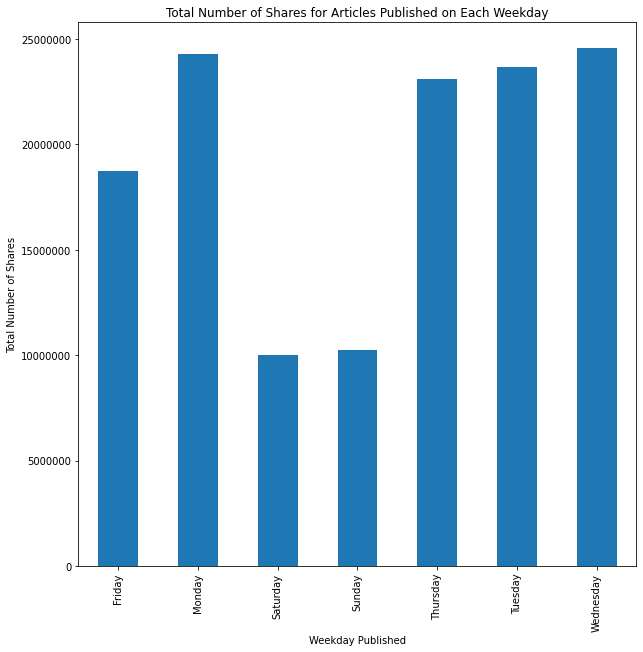

In [19]:
#Number of shares for articles published on each weekday
plt.figure(figsize = (10, 10))
plt.ticklabel_format(style = "plain")
data.groupby("day_of_week")["shares"].sum().plot.bar()
plt.xlabel("Weekday Published")
plt.ylabel("Total Number of Shares")
plt.title("Total Number of Shares for Articles Published on Each Weekday")

Text(0.5, 1.0, 'Number of Articles Published on Each Weekday by Popularity')

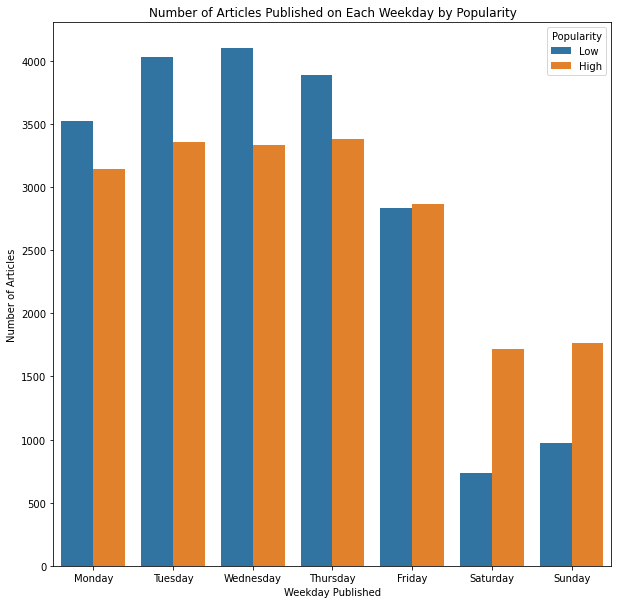

In [42]:
#Number of articles published on each weekday by popularity
plt.figure(figsize = (10, 10))
g = sns.countplot(x = "day_of_week", hue = "Popularity", data = data)
plt.xlabel("Weekday Published")
plt.ylabel("Number of Articles")
plt.title("Number of Articles Published on Each Weekday by Popularity")

In [74]:
article_count_by_data_channel = pd.DataFrame(data.groupby(["data_channel", "Popularity"]).count().iloc[:,0])
article_count_by_data_channel.columns = ["Count"]
totals = list(np.repeat(list(article_count_by_data_channel.groupby("data_channel").sum()["Count"]), 2))
article_count_by_data_channel["Percentage"] = (article_count_by_data_channel["Count"] / totals) * 100
article_count_by_data_channel

Count  Percentage
data_channel  Popularity                   
Business      Low          3229   51.597955
              High         3029   48.402045
Entertainment Low          4413   62.533655
              High         2644   37.466345
Lifestyle     Low          3298   40.058302
              High         4935   59.941698
Social Media  Low           664   28.583728
              High         1659   71.416272
Tech          Low          2987   40.661585
              High         4359   59.338415
World         Low          5491   65.159606
              High         2936   34.840394

Text(0.5, 1.0, 'Total Number of Shares for Articles in Each Data Channel')

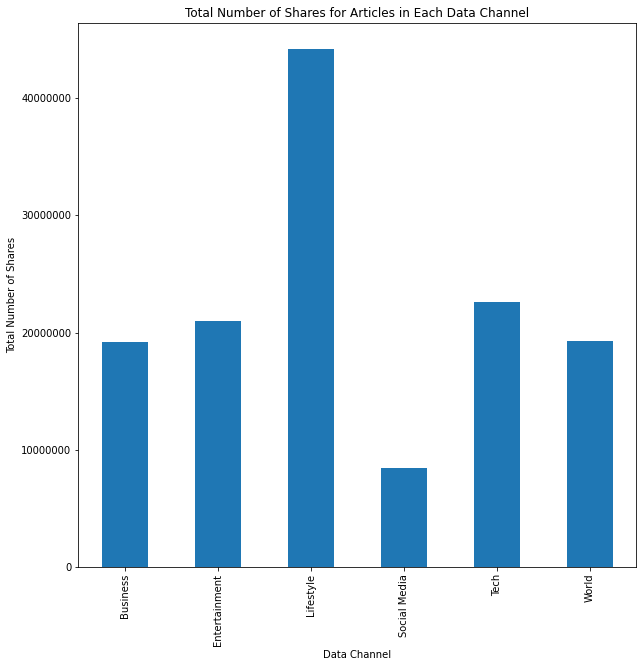

In [44]:
#Number of shares for articles in each data channel
plt.figure(figsize = (10, 10))
plt.ticklabel_format(style = "plain")
data.groupby("data_channel")["shares"].sum().plot.bar()
plt.xlabel("Data Channel")
plt.ylabel("Total Number of Shares")
plt.title("Total Number of Shares for Articles in Each Data Channel")

Text(0.5, 1.0, 'Number of Articles in Each Data Channel by Popularity')

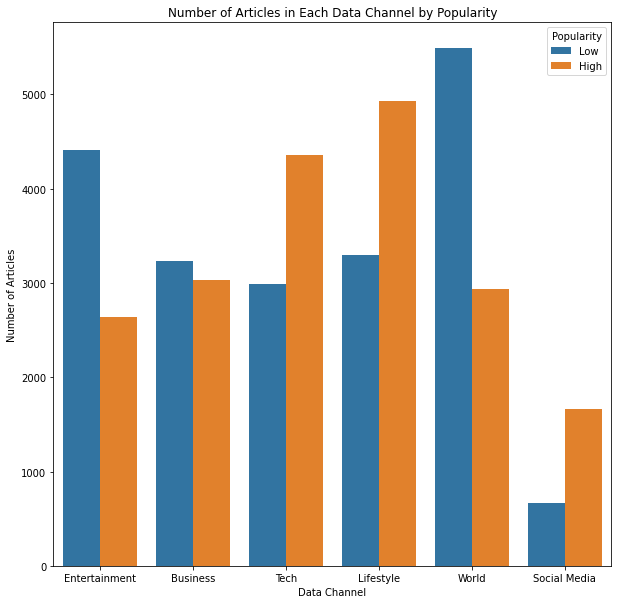

In [43]:
#Number of articles in each data channel by popularity
plt.figure(figsize = (10, 10))
g = sns.countplot(x = "data_channel", hue = "Popularity", data = data)
plt.xlabel("Data Channel")
plt.ylabel("Number of Articles")
plt.title("Number of Articles in Each Data Channel by Popularity")

Text(0.5, 1.0, 'Histogram of Number of Images for Articles With Less Than 20 Images')

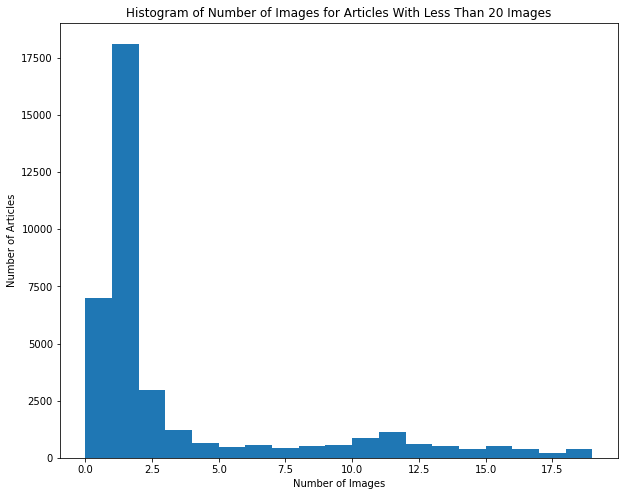

In [21]:
plt.figure(figsize = (10, 8))
plt.hist(data[data["num_imgs"] < 20]["num_imgs"], bins = 19)
plt.xlabel("Number of Images")
plt.ylabel("Number of Articles")
plt.title("Histogram of Number of Images for Articles With Less Than 20 Images")

Text(0.5, 1.0, 'Histogram of Number of Videos for Articles With Less Than 15 Videos')

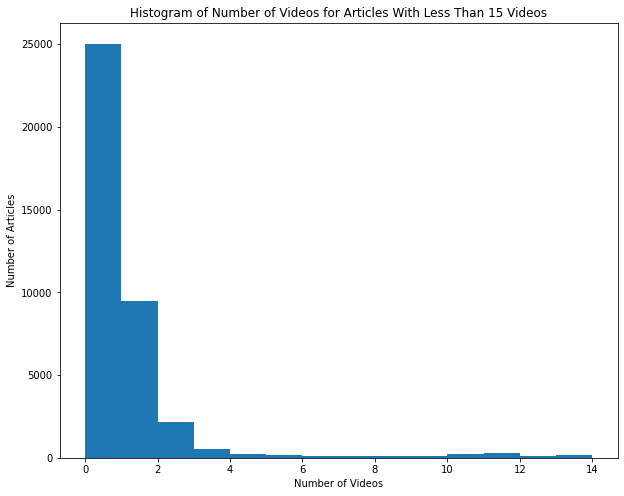

In [22]:
plt.figure(figsize = (10, 8))
plt.hist(data[data["num_videos"] < 15]["num_videos"], bins = 14)
plt.xlabel("Number of Videos")
plt.ylabel("Number of Articles")
plt.title("Histogram of Number of Videos for Articles With Less Than 15 Videos")

Text(0.5, 1.0, 'Histogram of Number of Videos for Articles With Less Than 15 Videos')

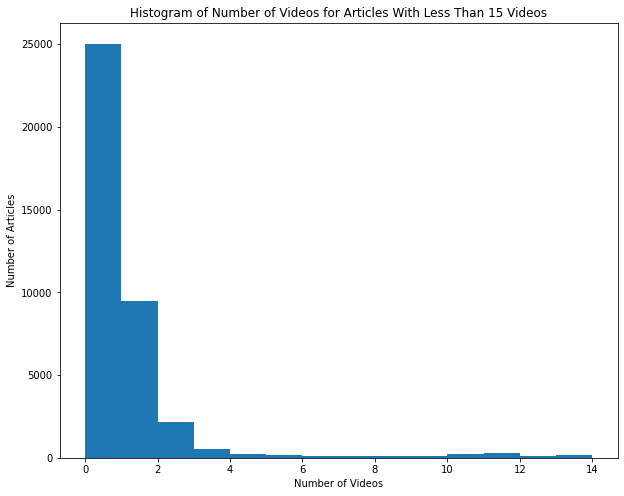

In [22]:
plt.figure(figsize = (10, 8))
plt.hist(data[data["num_videos"] < 15]["num_videos"], bins = 14)
plt.xlabel("Number of Videos")
plt.ylabel("Number of Articles")
plt.title("Histogram of Number of Videos for Articles With Less Than 15 Videos")

## Model Building

### Naive Bayes, No Processing

In [23]:
y = data["Popularity"]
X = data.iloc[:, 0:-4]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 273)

In [25]:
BNB = BernoulliNB()

BNB.fit(X_train, y_train)
print(BNB)

y_pred = BNB.predict(X_test)
print(accuracy_score(y_test, y_pred))

BernoulliNB()
0.6121684628907743


In [26]:
naive_bayes_cv_score = cross_val_score(BNB, X, y, cv = 10)
naive_bayes_cv_score.mean()

0.604026579696461

### Random Forest, No Processing

In [27]:
RF = RandomForestClassifier(n_estimators = 100, random_state = 273) 

RF.fit(X_train, y_train)

y_pred = RF.predict(X_test) 
print(accuracy_score(y_test, y_pred))

0.657647328594359


In [28]:
rf_cv_score = cross_val_score(RF, X, y, cv = 10)
rf_cv_score.mean()

0.6392177835067946

### K Nearest Neighbors, No Processing

In [29]:
X_scaled = preprocessing.scale(X)

In [30]:
X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.33, random_state = 273)

In [31]:
errors = []
for k in range(1, 26):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_scaled_train, y_train)
    pred_k = model.predict(X_scaled_test)
    errors.append(np.mean(pred_k != y_test))

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 26), errors, color = "blue", linestyle = "dashed", marker = "o", markerfacecolor = "red", markersize=10)
plt.title("Error Rate vs. K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")

In [ ]:
model = KNeighborsClassifier(n_neighbors = 9)
model.fit(X_scaled_train, y_train)
y_pred = model.predict(X_scaled_test)
print(accuracy_score(y_test, y_pred))

### Process the Data by Removing Highly Correlated Variables

In [ ]:
#The columns "n_non_stop_words", "n_non_stop_unique_tokens", "kw_avg_min", as these show high correlation with other variables
X_process = data.copy()
X.drop(["n_non_stop_words", "n_non_stop_unique_tokens", "kw_avg_min"], axis = 1, inplace = True)

In [ ]:
y = X_process["Popularity"]
X = X_process.iloc[:, 0:-4]

In [ ]:
X_transformed_train, X_transformed_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 273)

#### Naive Bayes

In [ ]:
BNB = BernoulliNB()

BNB.fit(X_transformed_train, y_train)
y_pred = BNB.predict(X_transformed_test)
print(accuracy_score(y_test, y_pred))

In [ ]:
naive_bayes_cv_score = cross_val_score(BNB, X, y, cv = 10)
naive_bayes_cv_score.mean()

#### Random Forest

In [ ]:
RF = RandomForestClassifier(n_estimators = 100, random_state = 273) 

RF.fit(X_transformed_train, y_train)

y_pred = RF.predict(X_transformed_test) 
print(accuracy_score(y_test, y_pred))

In [ ]:
rf_cv_score = cross_val_score(RF, X, y, cv = 10)
rf_cv_score.mean()

#### K Nearest Neighbors

In [ ]:
X_scaled = preprocessing.scale(X)

In [ ]:
X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.33, random_state = 273)

In [ ]:
errors = []
for k in range(1, 26):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_scaled_train, y_train)
    pred_k = model.predict(X_scaled_test)
    errors.append(np.mean(pred_k != y_test))

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 26), errors, color = "blue", linestyle = "dashed", marker = "o", markerfacecolor = "red", markersize=10)
plt.title("Error Rate vs. K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")

In [ ]:
model = KNeighborsClassifier(n_neighbors = 9)
model.fit(X_scaled_train, y_train)
y_pred = model.predict(X_scaled_test)
print(accuracy_score(y_test, y_pred))

### Process the Data by Removing Rows Where the Articles Have No Words

In [ ]:
data_with_words = data[data["n_tokens_content"] > 0]
data_with_words.reset_index(inplace = True, drop = True)
data_with_words.describe()

In [ ]:
min_shares = data_with_words["shares"].min() - 1
shares_50 = data_with_words["shares"].quantile(.50)
max_shares = data_with_words["shares"].max() + 1

popularity = pd.cut(data_with_words["shares"], bins = [min_shares, shares_50, max_shares], 
       labels = ["Low", "High"])

data_with_words["Popularity"] = popularity

In [ ]:
X_process = data_with_words.copy()

y = X_process["Popularity"]
X = X_process.iloc[:, 0:-4]

In [ ]:
X_transformed_train, X_transformed_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 273)

#### Naive Bayes

In [ ]:
BNB = BernoulliNB()

BNB.fit(X_transformed_train, y_train)
y_pred = BNB.predict(X_transformed_test)
print(accuracy_score(y_test, y_pred))

In [ ]:
naive_bayes_cv_score = cross_val_score(BNB, X, y, cv = 10)
naive_bayes_cv_score.mean()

#### Random Forest

In [ ]:
RF = RandomForestClassifier(n_estimators = 100, random_state = 273) 

RF.fit(X_transformed_train, y_train)

y_pred = RF.predict(X_transformed_test) 
print(accuracy_score(y_test, y_pred))

In [ ]:
rf_cv_score = cross_val_score(RF, X, y, cv = 10)
rf_cv_score.mean()

#### K Nearest Neighbors

In [ ]:
X_scaled = preprocessing.scale(X)

In [ ]:
X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.33, random_state = 273)

In [ ]:
errors = []
for k in range(1, 26):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_scaled_train, y_train)
    pred_k = model.predict(X_scaled_test)
    errors.append(np.mean(pred_k != y_test))

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 26), errors, color = "blue", linestyle = "dashed", marker = "o", markerfacecolor = "red", markersize=10)
plt.title("Error Rate vs. K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")

In [ ]:
model = KNeighborsClassifier(n_neighbors = 11)
model.fit(X_scaled_train, y_train)
y_pred = model.predict(X_scaled_test)
print(accuracy_score(y_test, y_pred))

### Process the Data by Removing Articles With More Than 2500 Shares

In [ ]:
X_process = data[data["shares"] < 2500]
plt.hist(X_process["shares"])

In [ ]:
min_shares = X_process["shares"].min() - 1
shares_50 = X_process["shares"].quantile(.50)
max_shares = X_process["shares"].max() + 1

popularity = pd.cut(X_process["shares"], bins = [min_shares, shares_50, max_shares], 
       labels = ["Low", "High"])

X_process["Popularity"] = popularity

In [ ]:
y = X_process["Popularity"]
X = X_process.iloc[:, 0:-4]

In [ ]:
X_transformed_train, X_transformed_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 273)

#### Naive Bayes

In [ ]:
BNB = BernoulliNB()

BNB.fit(X_transformed_train, y_train)
y_pred = BNB.predict(X_transformed_test)
print(accuracy_score(y_test, y_pred))

In [ ]:
naive_bayes_cv_score = cross_val_score(BNB, X, y, cv = 10)
naive_bayes_cv_score.mean()

#### Random Forest

In [ ]:
RF = RandomForestClassifier(n_estimators = 100, random_state = 273) 

RF.fit(X_transformed_train, y_train)

y_pred = RF.predict(X_transformed_test) 
print(accuracy_score(y_test, y_pred))

In [ ]:
rf_cv_score = cross_val_score(RF, X, y, cv = 10)
rf_cv_score.mean()

#### K Nearest Neighbors

In [ ]:
X_scaled = preprocessing.scale(X)

In [ ]:
X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.33, random_state = 273)

In [ ]:
errors = []
for k in range(1, 26):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_scaled_train, y_train)
    pred_k = model.predict(X_scaled_test)
    errors.append(np.mean(pred_k != y_test))

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 26), errors, color = "blue", linestyle = "dashed", marker = "o", markerfacecolor = "red", markersize=10)
plt.title("Error Rate vs. K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")

In [ ]:
model = KNeighborsClassifier(n_neighbors = 6)
model.fit(X_scaled_train, y_train)
y_pred = model.predict(X_scaled_test)
print(accuracy_score(y_test, y_pred))

In [ ]:
y = X_process["Popularity"]
X = X_process.iloc[:, 0:-4]

### Process the Data by Performing Feature Selection on the Data

In [ ]:
X_process = data.copy()

y = X_process["Popularity"]
X = X_process.iloc[:, 0:-4]

In [ ]:
X_transformed_train, X_transformed_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 273)

In [ ]:
mutual_info = mutual_info_classif
info = mutual_info(X_transformed_train, y_train)
info_dict = dict(list(enumerate(info)))
values = sorted(info_dict.values(), reverse = True)

In [ ]:
info_gain = pd.DataFrame(info_dict, index = [0]).transpose()
info_gain.columns = ["info_gain"]
info_gain["variable"] = list(X.columns)
info_gain = info_gain.iloc[:, [-1,0]].sort_values(by = "info_gain", ascending = False)
info_gain.head(20)

In [ ]:
top_15 = list(info_gain[0:15].index)

In [ ]:
X = X.iloc[:, top_15]

In [ ]:
X_transformed_train, X_transformed_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 273)

#### Naive Bayes

In [ ]:
BNB = BernoulliNB()

BNB.fit(X_transformed_train, y_train)
y_pred = BNB.predict(X_transformed_test)
print(accuracy_score(y_test, y_pred))

In [ ]:
naive_bayes_cv_score = cross_val_score(BNB, X, y, cv = 10)
naive_bayes_cv_score.mean()

#### Random Forest

In [ ]:
RF = RandomForestClassifier(n_estimators = 100, random_state = 273) 

RF.fit(X_transformed_train, y_train)

y_pred = RF.predict(X_transformed_test) 
print(accuracy_score(y_test, y_pred))

In [ ]:
rf_cv_score = cross_val_score(RF, X, y, cv = 10)
rf_cv_score.mean()

#### K Nearest Neighbors

In [ ]:
X_scaled = preprocessing.scale(X)

In [ ]:
X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.33, random_state = 273)

In [ ]:
errors = []
for k in range(1, 26):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_scaled_train, y_train)
    pred_k = model.predict(X_scaled_test)
    errors.append(np.mean(pred_k != y_test))

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 26), errors, color = "blue", linestyle = "dashed", marker = "o", markerfacecolor = "red", markersize=10)
plt.title("Error Rate vs. K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")

In [ ]:
model = KNeighborsClassifier(n_neighbors = 14)
model.fit(X_scaled_train, y_train)
y_pred = model.predict(X_scaled_test)
print(accuracy_score(y_test, y_pred))

### Combine All Processing Steps

In [ ]:
X_process = data.copy()
X_process.drop(["n_non_stop_words", "n_non_stop_unique_tokens", "kw_avg_min"], axis = 1, inplace = True)

In [ ]:
X_process = X_process[X_process["n_tokens_content"] > 0]
X_process.reset_index(inplace = True, drop = True)

In [ ]:
X_process = X_process[X_process["shares"] < 4500]

In [ ]:
min_shares = X_process["shares"].min() - 1
shares_50 = X_process["shares"].quantile(.50)
max_shares = X_process["shares"].max() + 1

popularity = pd.cut(X_process["shares"], bins = [min_shares, shares_50, max_shares], 
       labels = ["Low", "High"])

X_process["Popularity"] = popularity

In [ ]:
y = X_process["Popularity"]
X = X_process.iloc[:, 0:-4]

In [ ]:
X_transformed_train, X_transformed_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 273)

In [ ]:
mutual_info = mutual_info_classif
info = mutual_info(X_transformed_train, y_train)
info_dict = dict(list(enumerate(info)))
values = sorted(info_dict.values(), reverse = True)

In [ ]:
info_gain = pd.DataFrame(info_dict, index = [0]).transpose()
info_gain.columns = ["info_gain"]
info_gain["variable"] = list(X.columns)
info_gain = info_gain.iloc[:, [-1,0]].sort_values(by = "info_gain", ascending = False)
info_gain.head(20)

In [ ]:
top_14 = list(info_gain[0:14].index)

In [ ]:
X = X.iloc[:, top_14]

In [ ]:
X.head()

In [ ]:
X_transformed_train, X_transformed_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 273)

#### Naive Bayes

In [ ]:
BNB = BernoulliNB()

BNB.fit(X_transformed_train, y_train)
y_pred = BNB.predict(X_transformed_test)
print(accuracy_score(y_test, y_pred))

In [ ]:
naive_bayes_cv_score = cross_val_score(BNB, X, y, cv = 10)
naive_bayes_cv_score.mean()

#### Random Forest

In [ ]:
RF = RandomForestClassifier(n_estimators = 100, random_state = 273) 

RF.fit(X_transformed_train, y_train)

y_pred = RF.predict(X_transformed_test) 
print(accuracy_score(y_test, y_pred))

In [ ]:
rf_cv_score = cross_val_score(RF, X, y, cv = 10)
rf_cv_score.mean()

#### K Nearest Neighbors

In [ ]:
X_scaled = preprocessing.scale(X)

In [ ]:
pd.DataFrame(X_scaled)

In [ ]:
X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.33, random_state = 273)

In [ ]:
errors = []
for k in range(1, 26):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_scaled_train, y_train)
    pred_k = model.predict(X_scaled_test)
    errors.append(np.mean(pred_k != y_test))

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 26), errors, color = "blue", linestyle = "dashed", marker = "o", markerfacecolor = "red", markersize=10)
plt.title("Error Rate vs. K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")

In [ ]:
model = KNeighborsClassifier(n_neighbors = 11)
model.fit(X_scaled_train, y_train)
y_pred = model.predict(X_scaled_test)
print(accuracy_score(y_test, y_pred))